# 빅데이터 분석기사 도움말 활용팁

In [ ]:
import scipy
",".join(dir(scipy.stats))

'BootstrapMethod,CensoredData,ConstantInputWarning,Covariance,DegenerateDataWarning,FitError,MonteCarloMethod,NearConstantInputWarning,PermutationMethod,__all__,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__,__path__,__spec__,_axis_nan_policy,_biasedurn,_binned_statistic,_binomtest,_boost,_censored_data,_common,_constants,_continuous_distns,_covariance,_crosstab,_discrete_distns,_distn_infrastructure,_distr_params,_entropy,_fit,_hypotests,_kde,_ksstats,_levy_stable,_mannwhitneyu,_morestats,_mstats_basic,_mstats_extras,_multicomp,_multivariate,_mvn,_odds_ratio,_page_trend_test,_qmc,_qmc_cy,_qmvnt,_rcont,_relative_risk,_resampling,_rvs_sampling,_sensitivity_analysis,_sobol,_statlib,_stats,_stats_mstats_common,_stats_py,_stats_pythran,_survival,_tukeylambda_stats,_variation,_warnings_errors,alexandergovern,alpha,anderson,anderson_ksamp,anglit,ansari,arcsine,argus,barnard_exact,bartlett,bayes_mvs,bernoulli,beta,betabinom,betaprime,biasedurn,binned_statistic,binned

- 설명서

In [ ]:
help(scipy.stats.chi2_contingency)

Help on function chi2_contingency in module scipy.stats.contingency:

chi2_contingency(observed, correction=True, lambda_=None)
    Chi-square test of independence of variables in a contingency table.
    
    This function computes the chi-square statistic and p-value for the
    hypothesis test of independence of the observed frequencies in the
    contingency table [1]_ `observed`.  The expected frequencies are computed
    based on the marginal sums under the assumption of independence; see
    `scipy.stats.contingency.expected_freq`.  The number of degrees of
    freedom is (expressed using numpy functions and attributes)::
    
        dof = observed.size - sum(observed.shape) + observed.ndim - 1
    
    
    Parameters
    ----------
    observed : array_like
        The contingency table. The table contains the observed frequencies
        (i.e. number of occurrences) in each category.  In the two-dimensional
        case, the table is often described as an "R x C table".
    

# 6회 기출문제 응용

## Section 1 응용
- tips 데이터셋 활용한 적합성 검정

In [ ]:
# 코드

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


### 문제1
- 문제 : Smoker가 'Yes'으로 분류된 남성과 여성의 비율을 소수점 이하 둘째 자리까지 출력하시오.

In [ ]:
# 코드

smoker,No,Yes
sex,,
Male,97,60
Female,54,33


In [ ]:
# 코드

smoker,No,Yes
sex,,
Male,0.617834,0.382166
Female,0.620690,0.379310


In [ ]:
# 코드

0.382 0.379


### 문제2
- 팁을 준 고객들 중 남성과 여성의 비율이 50:50인지를 검정하는 간단한 적합도 검정을 수행

In [ ]:
# 코드

smoker,No,Yes
sex,,
Male,97,60
Female,54,33


In [ ]:
# 코드

카이제곱 검정 통계량: 0.059
p-value, 유의확률: 0.8080543378472314
기대빈도수: [[58.63070539 31.36929461]
 [98.36929461 52.63070539]]


### 문제3
- 위의 통계량에 대한 유의확률(p-value)을 출력(반올림하여 소수점 이하 넷째 자리까지 계산)하고, 유의수준 5% 하에서 가설 검정의 결과를 (귀무가설 채택 / 기각) 중 하나를 선택하시오.
- 가설검정
  + 귀무가설 : 남성과 여성 고객의 비율이 50:50이다.
  + 대립가설 : 남성과 여성 고객의 비율이 50:50이 아니다.

In [ ]:
# 코드

귀무가설 채택


## Section 2 응용
- diamonds 데이터셋 활용
- 결측치(NA)를 포함하는 모든 행을 제거한 후, (carat, depth, table) 항목을 이용하여 price를 예측하는 다중 선형회귀 모형을 구축하고 다음 수행 결과를 출력한다.

In [ ]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
diamonds.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [ ]:
df = diamonds.dropna()
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


### 문제1
- carat 항목에 대한 회귀계수를 구하시오. 단, 출력문은 print()를 이용하고 소수점 이하 넷째 자리에서 반올림하여 소수점 이하 셋째 자리까지 출력하시오.

In [ ]:
# 코드

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.795e+05
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:53:06   Log-Likelihood:                -19068.
No. Observations:               53940   AIC:                         3.814e+04
Df Residuals:                   53936   BIC:                         3.818e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9714      0.088     78.979      0.0

In [ ]:
formula = "price ~ carat + depth + table"
model = ols(formula, data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 1.049e+05
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:53:06   Log-Likelihood:            -4.7194e+05
No. Observations:               53940   AIC:                         9.439e+05
Df Residuals:                   53936   BIC:                         9.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.3e+04    390.918     33.264      0.0

In [ ]:
# Ozone의 회귀계수
result = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
np.round(result.loc["carat", "coef"], 3)

7858.77

### 문제2
- table 항목에 대한 t-통계량을 소수점 이하 셋째 자리까지 출력하시오.


In [ ]:
# 코드

-33.259

### 문제3
- 다음 예측변수 값에 대한 Price를 예측하고, carat 항목의 계수값에 대한 95% 신뢰구간을 출력하시오.
  + carat = 0.35,
  + depth = 57.5
  + table = 53.1

In [ ]:
# 코드

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [ ]:
# 코드

Intercept    13003.440524
carat         7858.770510
depth         -151.236347
table         -104.472780
dtype: float64

In [ ]:
# 코드

예측값: 1510.416


In [ ]:
# 코드

예측값: 671.338


# 7회 기출문제 응용

## Section1 응용
- boston 데이터 중에서 상관관계가 가장 작은 값을 구하시오.

In [ ]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024/한국SW기술진흥협회/Python기초통계/작업장_제3유형/기출문제/data/'
df = pd.read_csv(DATA_PATH + "boston.csv", encoding="euc-kr", index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# 대각선을 제외하고 상삼각 행렬만 남기기 (np.triu: 상삼각 행렬, k=1로 설정하여 대각선 바로 위부터 포함)
# 코드

# 상삼각 행렬에서 가장 큰 상관계수 찾기
# 코드

(-0.7692301132258282, ('nox', 'dis'))

## Section2 응용
- tips 데이터를 이용하여 total_bill과 tip 사이의 관계를 분석한다.

### 문제 1
- total bill을 이용하여 tip을 예측하는 모형을 구축하시오.

In [ ]:
# 코드

((244, 7), (244, 7))

In [ ]:
# 코드

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           6.69e-34
Time:                        00:55:16   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

### 문제2
- 구축된 모형에 대한 결정계수의 값을 출력하시오.

In [ ]:
# 코드

결정계수: 0.457


### 문제3
- tip에 대한 키의 오즈비(Odds Ratio, total bill의 변화가 몸무게 로그 오즈에 미치는 영향을 출력하시오)

In [ ]:
# 코드

const         0.920270
total_bill    0.105025
dtype: float64

In [ ]:
# 코드

1.111


## Section3 응용


### 문제1
- 독립변수 total_bill, tip으로 sex를 이용하여 성별(Male=0, Female=1)을 분류하는 모형을 구축하시오.을 예측하고자 한다. 다음 수행 결과를 출력하시오.
- statsmodels.api에 포함되어 있는 Logit 함수를 이용하시오.

In [ ]:
# 코드

((244, 7), (244, 7))

In [ ]:
# 코드

Optimization terminated successfully.
         Current function value: 0.640454
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  성별_변환   No. Observations:                  244
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Mar 2024   Pseudo R-squ.:                 0.01682
Time:                        01:25:32   Log-Likelihood:                -156.27
converged:                       True   LL-Null:                       -158.94
Covariance Type:            nonrobust   LLR p-value:                   0.02075
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill    -0.0375      0.020     -1.852      0.064      -0.077       0.002
tip            0.0414      0.

### 문제2
- 키, 몸무게에 대한 유의확률을 출력하고 최대 유의확률 값을 출력하시오.

In [ ]:
# 코드

const         0.787173
total_bill    0.073035
tip           0.839298
dtype: float64

In [ ]:
# 코드

0.8392975186762768

### 문제3
- 훈련:평가=70:30로 구분하여 평가 데이터에 대한 혼동행렬 ROC, AUC를 출력한다.

(244, 7) (244, 8)
(244, 2) (244,)
(170, 2) (74, 2) (170,) (74,)
Optimization terminated successfully.
         Current function value: 0.652136
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  성별_변환   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Tue, 19 Mar 2024   Pseudo R-squ.:                 0.01536
Time:                        01:28:23   Log-Likelihood:                -110.86
converged:                       True   LL-Null:                       -112.59
Covariance Type:            nonrobust   LLR p-value:                   0.06291
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill    -0.0307      0.023     -1.331 

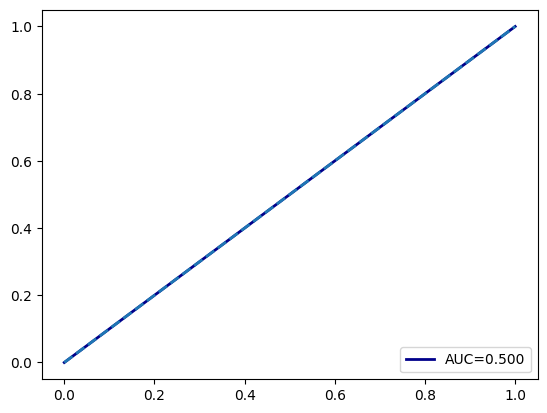

In [ ]:
# 코